<a href="https://colab.research.google.com/github/LianaHuang99/Recommendation-System/blob/main/modeling_0117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a model based on the data you have scraped. Don't worry if the model is far from perfect. You can always improve later. The most important thing is your story, you can answer the following questions after you finish modeling.

1. Why this project is important? What problem are you trying to solve?

This project aims to generate personalized movie recommendations for users, enhancing their engagement, interest, and overall satisfaction. By delivering tailored content, it reduces customer churn and directly contributes to increased revenue for streaming platforms, making it a critical tool for improving customer retention and business growth.

2. How do you measure the model performance (metrics)? What is the benchmark?

I use RMSE as the metric to measure the model performance. The benchmark is the recommendation based on random guess. The RMSE of the benchmark is about 2.

3. How is your model? Have achieved your goal? How to evaluate the business value of your model?

My model performs well, achieving an RMSE of 0.93—a reduction of more than 50%. This improvement enhances customer satisfaction and reduces churn. For example, if the churn rate was initially 10%, the model reduces it to 8%, retaining 2% of revenue. Additionally, by attracting new customers through personalized recommendations, the model directly drives annual revenue growth.

4. Any insights have you gotten from your model? Any actionable suggestions can you provide to your business partner?

User Clustering:

User clusters were derived using K-Means clustering on user features such as latent factors (from SVD), demographics (e.g., age, gender, occupation), and behavioral patterns (e.g., average ratings, genre preferences).
Clustering revealed five distinct groups:
Cluster 0: Older male educators and engineers favoring Film-Noir, though top-rated movies lean toward Comedy and Romance.
Cluster 1: Younger, diverse professionals preferring War, with top-rated movies spanning Comedy and Drama.
Cluster 2: Creative professionals strongly aligned with Documentaries.
Cluster 3: Male students showing mixed preferences, favoring Documentaries and Drama.
Cluster 4: Balanced demographics with a general preference for Film-Noir, though top-rated movies vary.
Genre-Content Mismatch:

Some clusters (e.g., 0 and 1) exhibit a gap between their general genre preferences and the genres of top-rated movies, suggesting potential gaps in catalog content.
Actionable Suggestions:
Cluster Identification:

Use K-Means clustering on latent features (e.g., user embeddings from SVD) combined with demographic and behavioral data to segment users into clusters. Ensure appropriate preprocessing, such as scaling and feature selection, for better results.
Tailored Recommendations:

Personalize recommendations based on cluster preferences:
Cluster 0: Recommend Film-Noir classics and explore Comedy-Romance blends.
Cluster 1: Focus on promoting War movies and high-rated dramas.
Cluster 2: Prioritize Documentaries for engagement.
Content Acquisition:

Address genre gaps by acquiring or promoting underrepresented but preferred genres, such as Film-Noir and War.
Targeted Marketing:

Design campaigns tailored to cluster demographics:
Example: "Discover the Best of Film-Noir" for Cluster 0 and "Top Documentaries You Can't Miss" for Cluster 2.
Feedback Integration:

Use real-time feedback on recommendations to refine cluster definitions and improve genre alignment.
By leveraging user clusters from the model and aligning insights with content strategies, the platform can improve satisfaction, reduce churn, and drive revenue growth.

5. What is the most challenging part in the project? How did you solve it? How will you futher improve your model if you get more resources and time.

The most challenging parts of the project were:

Computing Similarity Scores and Predicting Ratings:

Challenge: Understanding how to compute similarity scores (e.g., cosine similarity) between users or items and using these scores to predict ratings accurately.
Solution: I carefully preprocessed the data, ensured normalization during similarity computation, and implemented both user-based and item-based collaborative filtering. For prediction, I weighted the ratings of similar users or items, ensuring predictions reflected genuine preferences.
Interpreting Insights from User and Item Matrices:

Challenge: Extracting meaningful insights from the user matrix and item matrix generated by SVD, such as understanding latent features and their impact on user preferences and movie characteristics.
Solution: I analyzed clusters formed by user embeddings (user matrix rows) to identify demographic and behavioral patterns. Similarly, I examined the item matrix to uncover movie attributes influencing preferences.
How Did You Solve It?
Similarity Computation and Predictions:

I focused on understanding the mathematical foundation of similarity measures and experimented with different approaches (e.g., cosine similarity for item-based and user-based filtering).
To ensure robust predictions, I validated the model using metrics like RMSE and adjusted hyperparameters (e.g., the number of neighbors in KNN-based filtering).
Interpreting Matrices:

To make sense of latent features from SVD, I used clustering techniques (e.g., K-Means) to segment users based on shared preferences.
For items, I mapped latent features to movie genres and identified patterns, such as which genres align with specific clusters.
How Will You Improve the Model with More Resources and Time?
Incorporate Additional Features:

Include more user features (e.g., location data, watch history) and movie metadata (e.g., director, runtime, awards) to improve the quality of similarity calculations and predictions.
Hybrid Recommendation System:

Combine collaborative filtering with content-based filtering to leverage both user behavior and item attributes.
Implement a model-based approach (e.g., matrix factorization with explicit regularization) to enhance scalability and accuracy.
Improved Interpretability:

Use visualizations (e.g., heatmaps, embeddings) to better understand latent features and how they relate to clusters or genres.
Scalability Enhancements:

Transition to distributed computation frameworks like Spark to handle larger datasets efficiently.
A/B Testing for Recommendations:

Deploy the model and test its impact on user engagement (e.g., watch time, click-through rate) to refine strategies based on real-world performance.


Make sure that your work includes these parts:
1. **Pre-model Analysis**: process and visualize data; get insights of features and target.
2. **Problem Definition**: translate the business needs into machine learning problems; design metrics to measure model performance.
3. **Feature Engineering**: create features which might improve model performance.
4. **Modeling**: Model selection, feature elimination, validation, hyperparameter tuning.
5. **Post-model Analysis**: Model performance, feature importance, actionable suggestions to business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<span style = 'font-size:30px;'> **Exploratory Data Analysis** </span>

<span style = 'font-size:20px;'> 1. u.data: user-item interaction data</span>

In [ ]:
data = pd.read_csv('u.data', sep = '\t', header = None)
data.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
data.columns = ['user_id', 'movie_id', 'rating','timestamp']
data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
data.shape

(100000, 4)

In [ ]:
data.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


<span style = 'font-size: 20px;'>**Observation:** there is no missing values in the ratings dataframe. The scale of ratings is 1 to 5. The mean rating is 3.53 with a standard deviation of 1.13. There are 25% of ratings<= 3, 50% ratings <= 4, and 75% ratings <= 4.</span>

In [ ]:
n_movies = data['movie_id'].nunique()
print('Number of movies:', n_movies)

Number of movies: 1682


In [ ]:
n_users = data['user_id'].nunique()
print('Number of users:', n_users)

Number of users: 943


In [ ]:
n_ratings = data['rating'].value_counts().sum()
print('Number of ratings:', n_ratings)

Number of ratings: 100000


In [ ]:
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Average number of ratings per user: 106.04
Average number of ratings per movie: 59.45


<span style = 'font-size:20px;'> 2. u.item: movies metadata</span>

In [ ]:
movies = pd.read_csv('u.item', sep="|", encoding='latin-1', header=None)
movies.columns = ['movie_id', 'movie_title' ,'release_date','video_release_date', 'imdb_url', 'unknown', 'Action',
                 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<span style = 'font-size: 20px;'>**Identify Duplicates Based on Movie Attributes**</span>

In [ ]:
columns = movies.columns.tolist()
len(movies), len(movies.groupby(by = columns[1:]))

(1682, 1664)

In [ ]:
# Find duplicates based on columns excluding movie_id
duplicates = movies[movies.duplicated(subset=columns[1:], keep = False)]
duplicates = duplicates.sort_values(by=['movie_title'])

print(duplicates[['movie_id','movie_title']])


      movie_id                     movie_title
669        670           Body Snatchers (1993)
572        573           Body Snatchers (1993)
1649      1650         Butcher Boy, The (1998)
1644      1645         Butcher Boy, The (1998)
1233      1234    Chairman of the Board (1998)
1653      1654    Chairman of the Board (1998)
245        246              Chasing Amy (1997)
267        268              Chasing Amy (1997)
1605      1606                 Deceiver (1997)
308        309                 Deceiver (1997)
1256      1257  Designated Mourner, The (1997)
1255      1256  Designated Mourner, The (1997)
347        348       Desperate Measures (1998)
328        329       Desperate Measures (1998)
499        500            Fly Away Home (1996)
303        304            Fly Away Home (1996)
1616      1617                Hugo Pool (1997)
1174      1175                Hugo Pool (1997)
1606      1607        Hurricane Streets (1998)
1394      1395        Hurricane Streets (1998)
304        30

In [ ]:
len(duplicates)

36

<span style = 'font-size: 20px;'>Map Duplicate movie_ids to a Single ID </span>

In [ ]:
# Create a mapping of movie_id -> unified_id

unified_id = duplicates.groupby(['movie_title', 'release_date'])['movie_id'].transform('min')
duplicates['unified_id'] = unified_id
movie_id_mapping = duplicates.set_index('movie_id')['unified_id'].to_dict()
movie_id_mapping

{670: 573,
 573: 573,
 1650: 1645,
 1645: 1645,
 1234: 1234,
 1654: 1234,
 246: 246,
 268: 246,
 1606: 309,
 309: 309,
 1257: 1256,
 1256: 1256,
 348: 329,
 329: 329,
 500: 304,
 304: 304,
 1617: 1175,
 1175: 1175,
 1607: 1395,
 1395: 1395,
 305: 305,
 865: 305,
 680: 266,
 266: 266,
 876: 876,
 881: 876,
 1625: 1477,
 1477: 1477,
 1680: 1429,
 1429: 1429,
 1658: 711,
 711: 711,
 1003: 878,
 878: 878,
 303: 297,
 297: 297}

In [ ]:
movies['movie_id'] = movies['movie_id'].map(lambda x: movie_id_mapping.get(x, x))
movies['movie_id'].nunique()

1664

In [ ]:
movies.drop_duplicates(inplace = True)
len(movies)

1664

In [ ]:
movies.to_csv('movies_clean.csv')

In [ ]:

number_movies_by_genre = {}
genres = movies.columns[6:]
for g in genres:
  count = movies[g].sum()
  number_movies_by_genre[g] = count

number_movies_by_genre

{'Action': 249,
 'Adventure': 133,
 'Animation': 42,
 "Children's": 120,
 'Comedy': 502,
 'Crime': 107,
 'Documentary': 50,
 'Drama': 716,
 'Fantasy': 22,
 'Film-Noir': 24,
 'Horror': 90,
 'Musical': 56,
 'Mystery': 60,
 'Romance': 244,
 'Sci-Fi': 100,
 'Thriller': 248,
 'War': 71,
 'Western': 27}

<span style = 'font-size 20px;'> **Unifiy the movie_ids** Using movie_id_mapping to unify the movie_ids for the movie with multiple movie ids in user-item interaction dataset.</span>

In [ ]:
data['movie_id'] = data['movie_id'].map(lambda x: movie_id_mapping.get(x, x))
data['movie_id'].nunique()

1664

In [ ]:
data.to_csv('data_clean.csv')

<span style = 'font-size:20px;'> 3. u.user: users' demographic information</span>

In [ ]:
users = pd.read_csv('u.user', sep="|", encoding='latin-1', header=None)
users.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']
users.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
columns = users.columns.tolist()
len(users), len(users.groupby(by = columns[1:]))

(943, 936)

In [ ]:
users[users.duplicated(subset=columns[1:], keep = False)].sort_values(by = ['age', 'zip code'])

,user_id,age,gender,occupation,zip code
66,67,17,M,student,60402
620,621,17,M,student,60402
197,198,21,F,student,55414
495,496,21,F,student,55414
436,437,27,F,other,20009
804,805,27,F,other,20009
427,428,28,M,student,55414
683,684,28,M,student,55414
349,350,32,M,student,97301
889,890,32,M,student,97301


<span style='font-size:20px;'> In the users demographic dataset, there are 14 users having the same demographic information but with different user IDs. Although these might be duplicated data, it is still possible that there are users with the same age, gender, occupation and living in the same zip code. So we just keep these data as it is.</span>

<span style = 'font-size:20px;'>**Handle duplicates in user-item interaction dataset.**

In movies dataset, there are 18 movies asigned with multiple movie_ids, this is fixed by asign the smallest movie_id to the movie and applied to the data dataset (user-item interaction dataset). Duplicates are found in data, the following steps are about removing or handling duplicates. </span>

In [ ]:
duplicates = data[data.duplicated(keep = False)]
duplicates_sorted = duplicates.sort_values(by=['user_id','movie_id'])
print(duplicates_sorted)

       user_id  movie_id  rating  timestamp
11227        3       329       4  889237455
35195        3       329       4  889237455
2810         7       266       4  891350703
8873         7       266       4  891350703
20946       13       329       2  886952246
...        ...       ...     ...        ...
82077      819       246       4  884012614
88800      870       246       3  881000751
91877      870       246       3  881000751
85379      939       266       2  880260636
90740      939       266       2  880260636

[70 rows x 4 columns]


<span style = 'font-size:20px;'> There are 70 rows are duplicated in all the four columns, the same user rated the same movie with the same rating and at the same time. So these are purely redundant information, which should be removed.</span>

In [ ]:
data_no_duplicates = data.drop_duplicates(subset=['user_id','movie_id','rating','timestamp'])
print(data_no_duplicates)

       user_id  movie_id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[99965 rows x 4 columns]


<span style = 'font-size:20px;'> There also could be rows which have different timestamps while the same for the rest three columns. These might be the same user rated the same movie at different time but with the same rating. So these are also redundant info and should be removed.</span>

In [ ]:
# Check for duplicate combinations of 'user_id','movie_id' and 'rating'
duplicates_data = data[data.duplicated(subset=['user_id', 'movie_id','rating'], keep=False)]
duplicates_data_sorted = duplicates_data.sort_values(by=['user_id','movie_id'])
print(duplicates_data_sorted)

       user_id  movie_id  rating  timestamp
20470        1       246       5  874965905
34550        1       246       5  875692927
5063         2       297       4  888550871
9201         2       297       4  888550774
11227        3       329       4  889237455
...        ...       ...     ...        ...
91586      937       297       4  876762200
85379      939       266       2  880260636
90740      939       266       2  880260636
70654      942       304       5  891282457
73640      942       304       5  891282816

[522 rows x 4 columns]


<span style = 'font-size:20px;'> There are 522 rows of such redundant information.</span>

In [ ]:
data_no_duplicates = data.drop_duplicates(subset=['user_id','movie_id','rating'])
print(data_no_duplicates)

       user_id  movie_id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[99739 rows x 4 columns]


<span style = 'font-size:20px;'> The same user could rate the same movie with different ratings at different time, these information should be considered but we can take the average of the rating and then drop the duplicated rows.</span>

In [ ]:
data = data_no_duplicates
multi_rated = data[data.duplicated(subset=['user_id', 'movie_id'], keep=False)]
multi_rated = multi_rated.sort_values(by = ['user_id','movie_id'])
multi_rated

,user_id,movie_id,rating,timestamp
3276,13,305,4,881514811
42231,13,305,5,882141425
5901,21,573,3,874951696
42741,21,573,2,874951898
6493,32,246,4,883717521
...,...,...,...,...
83728,863,1395,4,889289491
62716,894,246,4,882404137
90596,894,246,3,879896041
68880,934,297,5,891189969


In [ ]:
# Calculate the average rating for each duplicate pair
average_ratings = multi_rated.groupby(['user_id', 'movie_id'], as_index=False).agg({'rating': 'mean'})
print("Average Ratings:\n", average_ratings)

Average Ratings:
     user_id  movie_id  rating
0        13       305     4.5
1        21       573     2.5
2        32       246     4.5
3        35       266     3.5
4        50       246     3.5
5       113       246     4.5
6       159       876     1.5
7       291       573     4.5
8       325       305     2.5
9       334       297     4.5
10      341       876     4.5
11      343       297     4.5
12      344       246     3.5
13      354       297     4.5
14      354       305     3.5
15      359       246     3.5
16      360       297     3.5
17      385       304     3.5
18      405       573     2.0
19      433       246     3.5
20      451       266     1.5
21      453       246     4.5
22      457       304     4.5
23      521       246     4.5
24      532       305     2.5
25      536       304     3.5
26      560       246     4.5
27      608       305     3.5
28      613       297     4.5
29      617       573     2.5
30      643       246     4.5
31      648       878 

In [ ]:
data = data.merge(
    average_ratings,
    on=['user_id', 'movie_id'],
    how='left',
    suffixes=('', '_avg')
)
data['rating'] = data['rating_avg'].combine_first(data['rating'])
data = data.drop(columns=['rating_avg'])
data = data.drop_duplicates(subset=['user_id', 'movie_id'])

print(data)


       user_id  movie_id  rating  timestamp
0          196       242     3.0  881250949
1          186       302     3.0  891717742
2           22       377     1.0  878887116
3          244        51     2.0  880606923
4          166       346     1.0  886397596
...        ...       ...     ...        ...
99734      880       476     3.0  880175444
99735      716       204     5.0  879795543
99736      276      1090     1.0  874795795
99737       13       225     2.0  882399156
99738       12       203     3.0  879959583

[99693 rows x 4 columns]


In [ ]:
data.to_csv('data_clean.csv')

In [ ]:
movies.to_csv('movies_clean.csv')

<span style = 'font-size:20px;'> After removing duplicated rows and using average rating for multi-rated rows, the cleaned dataset has 99693 rows.</span>

<span style = 'font-size: 20px;'>**What is the distribution of movie ratings?**


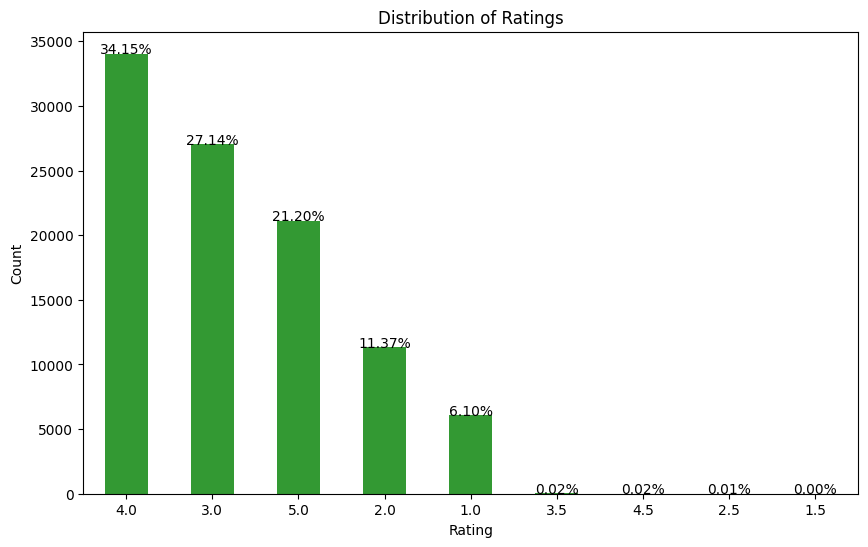

In [ ]:
rating_counts = data['rating'].value_counts()
rating_frequency = (rating_counts / rating_counts.sum()) * 100
plt.figure(figsize = (10,6))
rating_counts.plot(kind='bar', color = 'green', alpha = 0.8)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.title('Distribution of Ratings')

for index,(count,percentage) in enumerate(zip(rating_counts, rating_frequency)):

    plt.text(index, count + 0.5, f'{percentage:.2f}%', ha='center', fontsize = 10)

plt.show()

In [ ]:
mean_rating = data['rating'].mean()
print(f'Mean rating: {mean_rating:.2f}')

mean_rating_user = data.groupby('user_id')['rating'].mean()
print(f'Mean rating per user: {mean_rating_user.mean():.2f}')

mean_rating_movie = data.groupby('movie_id')['rating'].mean()
print(f'Mean rating per movie: {mean_rating_movie.mean():.2f}')

Mean rating: 3.53
Mean rating per user: 3.59
Mean rating per movie: 3.08


<span style = 'font-size: 20px;'>**Observation:** The most frequent rating is 4 which accounts for 34% of the total ratings. Only 6% ratings are 1. And there are about 1/5 ratings are the max score of 5. Overall, more than 80% ratings are above 2. The mean rating of this dataset is 3.53. The average rating given by users is 3.59</span>

In [ ]:
ratings_per_movie = data.groupby('movie_id').size()
C_movie = ratings_per_movie.median()
print(f"Median Ratings per Movie (C): {C_movie}")

Median Ratings per Movie (C): 27.0


<span style = 'font-size:20px;'> **Which movies are most frequently rated?**

In [ ]:
movie_rated_freq = data['movie_id'].value_counts().reset_index()
movie_rated_freq.columns = ['movie_id', 'n_ratings']
print(f'The top 10 rated movies are:\n {movie_rated_freq[:10]}')


The top 10 rated movies are:
    movie_id  n_ratings
0        50        583
1       258        509
2       100        508
3       181        507
4       294        485
5       286        481
6       288        478
7         1        452
8       300        431
9       121        429


<span style = 'font-size: 20px;'>**What are the lowest and highest rated movies?**

In [ ]:
movies_title = movies[['movie_id','movie_title','release_date']]
movie_rating = data.groupby('movie_id')['rating'].mean().reset_index()
movie_rating = movie_rating.merge(movies_title)
movie_rating

,movie_id,rating,movie_title,release_date
0,1,3.878319,Toy Story (1995),01-Jan-1995
1,2,3.206107,GoldenEye (1995),01-Jan-1995
2,3,3.033333,Four Rooms (1995),01-Jan-1995
3,4,3.550239,Get Shorty (1995),01-Jan-1995
4,5,3.302326,Copycat (1995),01-Jan-1995
...,...,...,...,...
1659,1677,3.000000,Sweet Nothing (1995),20-Sep-1996
1660,1678,1.000000,Mat' i syn (1997),06-Feb-1998
1661,1679,3.000000,B. Monkey (1998),06-Feb-1998
1662,1681,3.000000,You So Crazy (1994),01-Jan-1994


In [ ]:
min_rating = movie_rating['rating'].min()
lowest_rated_movies = movie_rating[movie_rating['rating'] == min_rating]

print(f'The lowest rated movies are:\n {lowest_rated_movies}')
print(f'The number of lowest rated movies is {len(lowest_rated_movies)}')

The lowest rated movies are:
       movie_id  rating                                        movie_title  \
311        314     1.0        3 Ninjas: High Noon At Mega Mountain (1998)   
433        437     1.0            Amityville 1992: It's About Time (1992)   
435        439     1.0                Amityville: A New Generation (1993)   
594        599     1.0  Police Story 4: Project S (Chao ji ji hua) (1993)   
777        784     1.0                               Beyond Bedlam (1993)   
...        ...     ...                                                ...   
1611      1626     1.0         Nobody Loves Me (Keiner liebt mich) (1994)   
1641      1659     1.0                    Getting Away With Murder (1996)   
1643      1661     1.0                                New Age, The (1994)   
1653      1671     1.0                          Further Gesture, A (1996)   
1660      1678     1.0                                  Mat' i syn (1997)   

     release_date  
311   01-Jan-1997  
433  

In [ ]:
max_rating = movie_rating['rating'].max()
highest_rated_movies = movie_rating[movie_rating['rating'] == max_rating]

print(f'The highest rated movies are:\n {highest_rated_movies}')
print(f'The number of highest rated movies is {len(highest_rated_movies)}')

The highest rated movies are:
       movie_id  rating                                        movie_title  \
807        814     5.0                      Great Day in Harlem, A (1994)   
1112      1122     5.0                     They Made Me a Criminal (1939)   
1179      1189     5.0                                 Prefontaine (1997)   
1191      1201     5.0         Marlene Dietrich: Shadow and Light (1996)    
1282      1293     5.0                                    Star Kid (1997)   
1456      1467     5.0               Saint of Fort Washington, The (1993)   
1489      1500     5.0                          Santa with Muscles (1996)   
1525      1536     5.0                               Aiqing wansui (1994)   
1588      1599     5.0                      Someone Else's America (1995)   
1637      1653     5.0  Entertaining Angels: The Dorothy Day Story (1996)   

     release_date  
807   01-Jan-1994  
1112  01-Jan-1939  
1179  24-Jan-1997  
1191  02-Apr-1996  
1282  16-Jan-1998  
1

<span style ='font-size:20px;'>**How many ratings does each highest rated movie get?**

In [ ]:
highest_rated_movies_with_counts = highest_rated_movies.merge(movie_rated_freq, on='movie_id')
highest_rated_movies_with_counts

,movie_id,rating,movie_title,release_date,n_ratings
0,814,5.0,"Great Day in Harlem, A (1994)",01-Jan-1994,1
1,1122,5.0,They Made Me a Criminal (1939),01-Jan-1939,1
2,1189,5.0,Prefontaine (1997),24-Jan-1997,3
3,1201,5.0,Marlene Dietrich: Shadow and Light (1996),02-Apr-1996,1
4,1293,5.0,Star Kid (1997),16-Jan-1998,3
5,1467,5.0,"Saint of Fort Washington, The (1993)",01-Jan-1993,2
6,1500,5.0,Santa with Muscles (1996),08-Nov-1996,2
7,1536,5.0,Aiqing wansui (1994),22-Jul-1996,1
8,1599,5.0,Someone Else's America (1995),10-May-1996,1
9,1653,5.0,Entertaining Angels: The Dorothy Day Story (1996),27-Sep-1996,1


<span style ='font-size:20px;'>**How many ratings does each lowest rated movie get?**

In [ ]:

lowest_rated_movies_with_counts = lowest_rated_movies.merge(movie_rated_freq, on='movie_id')
lowest_rated_movies_with_counts

,movie_id,rating,movie_title,release_date,n_ratings
0,314,1.0,3 Ninjas: High Noon At Mega Mountain (1998),01-Jan-1997,5
1,437,1.0,Amityville 1992: It's About Time (1992),01-Jan-1992,5
2,439,1.0,Amityville: A New Generation (1993),01-Jan-1993,5
3,599,1.0,Police Story 4: Project S (Chao ji ji hua) (1993),16-Aug-1996,1
4,784,1.0,Beyond Bedlam (1993),01-Jan-1993,2
...,...,...,...,...,...
64,1626,1.0,Nobody Loves Me (Keiner liebt mich) (1994),09-Feb-1996,1
65,1659,1.0,Getting Away With Murder (1996),12-Apr-1996,1
66,1661,1.0,"New Age, The (1994)",01-Jan-1994,1
67,1671,1.0,"Further Gesture, A (1996)",20-Feb-1998,1


<span style ='font-size:20px;'>**Observations:** The highest and lowest rated movies based on the average ratings are not fair. Because some of them are only rated once or very few times. We should take the number of ratings into account. Use Bayesian Average to reduces bias, balances quality and popularity, and ensures fairness in rankings.

In [ ]:
#calculate the average number of ratings for a given movie

movie_stats = data.groupby('movie_id')['rating'].agg(['count', 'mean'])
movie_stats

,count,mean
movie_id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326
...,...,...
1677,1,3.000000
1678,1,1.000000
1679,1,3.000000


In [ ]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 59.91
Average rating for a given movie: 3.08


In [ ]:
bayesian_avg_ratings = data.groupby('movie_id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movie_id', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movie_id')

In [ ]:
movie_rank = movie_stats.sort_values('bayesian_avg', ascending=False)
movie_rank = movie_rank.merge(movies_title, on = 'movie_id')
print('The top 10 rated movies')
movie_rank.head(10)

The top 10 rated movies


,movie_id,count,mean,bayesian_avg,movie_title,release_date
0,50,583,4.358491,4.239,Star Wars (1977),01-Jan-1977
1,318,298,4.466443,4.234,Schindler's List (1993),01-Jan-1993
2,64,283,4.445230,4.206,"Shawshank Redemption, The (1994)",01-Jan-1994
3,483,243,4.456790,4.184,Casablanca (1942),01-Jan-1942
4,12,267,4.385768,4.146,"Usual Suspects, The (1995)",14-Aug-1995
5,127,413,4.283293,4.130,"Godfather, The (1972)",01-Jan-1972
6,98,390,4.289744,4.128,"Silence of the Lambs, The (1991)",01-Jan-1991
7,174,420,4.252381,4.106,Raiders of the Lost Ark (1981),01-Jan-1981
8,603,209,4.387560,4.096,Rear Window (1954),01-Jan-1954
9,313,350,4.245714,4.075,Titanic (1997),01-Jan-1997


In [ ]:
print('The lowest rated movies')
movie_rank.tail(10)

The lowest rated movies


,movie_id,count,mean,bayesian_avg,movie_title,release_date
1654,424,19,1.315789,2.653,Children of the Corn: The Gathering (1996),01-Jan-1996
1655,243,132,2.439394,2.638,Jungle2Jungle (1997),07-Mar-1997
1656,120,67,2.238806,2.635,Striptease (1996),28-Jun-1996
1657,743,39,1.948718,2.632,"Crow: City of Angels, The (1996)",30-Aug-1996
1658,931,57,2.157895,2.629,"Island of Dr. Moreau, The (1996)",23-Aug-1996
1659,988,86,2.313953,2.627,"Beautician and the Beast, The (1997)",07-Feb-1997
1660,890,43,1.953488,2.608,Mortal Kombat: Annihilation (1997),01-Jan-1997
1661,122,106,2.339623,2.606,"Cable Guy, The (1996)",14-Jun-1996
1662,687,69,2.188406,2.601,McHale's Navy (1997),18-Apr-1997
1663,688,44,1.840909,2.554,Leave It to Beaver (1997),22-Aug-1997


In [ ]:
print('The Bayesian average of the lowest rated movie based on the raw average rating')
movie_rank[movie_rank['movie_id'] == 314]

The Bayesian average of the lowest rated movie based on the raw average rating


,movie_id,count,mean,bayesian_avg,movie_title,release_date
1518,314,5,1.0,2.917,3 Ninjas: High Noon At Mega Mountain (1998),01-Jan-1997


In [ ]:
print('The Bayesian average of the highest rated movie based on the raw average rating')
movie_rank[movie_rank['movie_id'] == 814]

The Bayesian average of the highest rated movie based on the raw average rating


,movie_id,count,mean,bayesian_avg,movie_title,release_date
752,814,1,5.0,3.109,"Great Day in Harlem, A (1994)",01-Jan-1994


<span style = 'font-size: 20px;'>**Data Pre-processing**

<span style = 'font-size: 20px;'> **The user-item matrix contains significant amount of missing values.**

In [ ]:
# Transpose matrix to have users as rows and movies as columns, ratings as the value
user_item_matrix = data.pivot(index='user_id', columns='movie_id', values='rating')
user_item_matrix_np = user_item_matrix.values
user_item_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1672,1673,1674,1675,1676,1677,1678,1679,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_ratings_count = user_item_matrix.notna().sum(axis=1)  # Non-NaN values per user
movie_ratings_count = user_item_matrix.notna().sum(axis=0)  # Non-NaN values per movie

# Find the least number of ratings
least_movies_rated_by_user = user_ratings_count.min()
least_ratings_for_movie = movie_ratings_count.min()

print(f"Least number of movies a user rated: {least_movies_rated_by_user}")
print(f"Least number of ratings a movie received: {least_ratings_for_movie}")

Least number of movies a user rated: 19
Least number of ratings a movie received: 1


<span style = 'font-size: 20px;'> **Use Sparse Matrix for the user-item matrix**

In [ ]:
from scipy.sparse import csr_matrix

def create_X(df):

    M = data['user_id'].nunique()
    N = data['movie_id'].nunique()

    user_mapper = dict(zip(np.unique(data["user_id"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(data["movie_id"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(data["user_id"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(data["movie_id"])))

    user_index = [user_mapper[i] for i in data['user_id']]
    item_index = [movie_mapper[i] for i in data['movie_id']]

    X = csr_matrix((data["rating"], (user_index,item_index)), shape=(M,N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(data)

In [ ]:
X.shape

(943, 1664)

In [ ]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = 1-n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 93.65%


In [ ]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

943

In [ ]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 736 movies.
Least active user rated 19 movies.


In [ ]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

1664

In [ ]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 583 ratings.
Least rated movie has 1 ratings.


In [ ]:
# Count the number of movies with exactly one rating
num_movies_rated_once = (n_ratings_per_movie == 1).sum()

print(f"Number of movies rated only once: {num_movies_rated_once}")


Number of movies rated only once: 135


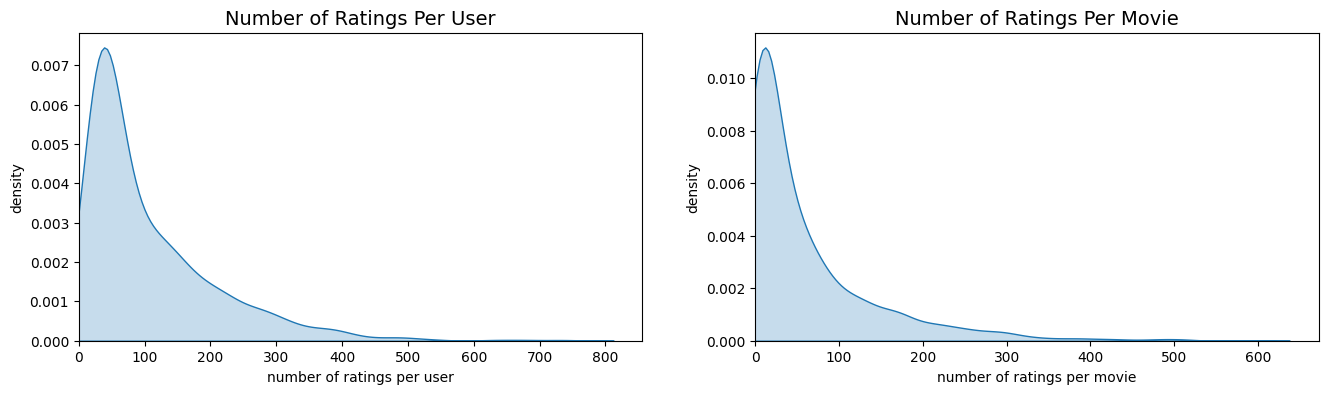

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

<span style = 'font-size: 30px;'> **Item-Based Collaborative Filtering with Cosine Similarity**

<span style ='font-size: 20px;'> Build Item-Item similarity matrix</span>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse import coo_matrix



In [ ]:

#Step 1: convert csr_matrix to coo_matrix for easier splitting
item_user_matrix = X.T
item_user_coo = item_user_matrix.tocoo()
movie_rows, user_cols, ratings = item_user_coo.row, item_user_coo.col, item_user_coo.data

# Step 2: Split into train and test
#np.random.seed(42)  # For reproducibility
indices = np.arange(len(ratings))
np.random.shuffle(indices)

# Initialize train and test indices
train_indices = []
test_indices = []

# Ensure every movie has at least one rating in the train set
for movie_id in np.unique(movie_rows):
    movie_ratings = np.where(movie_rows == movie_id)[0]
    if len(movie_ratings) > 2:
        n = int(len(movie_ratings) * 0.2)
        train_indices.extend(movie_ratings[:-n])  # Keep all but one in train
        test_indices.append(movie_ratings[-n:])   # Keep one in test
    else:
        train_indices.extend(movie_ratings)  # Keep the single interaction in train
# Ensure every user has at least one rating in the train set
for user_id in np.unique(user_cols):
    user_ratings = np.where(user_cols == user_id)[0]
    m = int(len(user_ratings) * 0.4)
    train_indices.extend(user_ratings[:-m])  # Keep all but one interaction in train
    test_indices.append(user_ratings[-m:])   # Keep one interaction in test

# Remove duplicates
train_indices = np.unique(train_indices)
test_indices = np.setdiff1d(np.arange(len(ratings)), train_indices)

# Create train and test matrices
train = coo_matrix(
    (ratings[train_indices], (movie_rows[train_indices], user_cols[train_indices])),
    shape=item_user_coo.shape
)

test = coo_matrix(
    (ratings[test_indices], (movie_rows[test_indices], user_cols[test_indices])),
    shape=item_user_coo.shape
)

In [ ]:
print("Movies in Train:", len(np.unique(train.row)))
print("Movies in Test:", len(np.unique(test.row)))
print("Users in Train:", len(np.unique(train.col)))
print("Users in Test:", len(np.unique(test.col)))


Movies in Train: 1552
Movies in Test: 1162
Users in Train: 943
Users in Test: 431


In [ ]:
# Total number of ratings
total_ratings = len(ratings)

# Number of ratings in the train and test sets
train_ratings_count = len(train_indices)
test_ratings_count = len(test_indices)

# Calculate percentages
train_percentage = (train_ratings_count / total_ratings) * 100
test_percentage = (test_ratings_count / total_ratings) * 100

print(f"Train Set: {train_percentage:.2f}% of ratings")
print(f"Test Set: {test_percentage:.2f}% of ratings")


Train Set: 92.06% of ratings
Test Set: 7.94% of ratings


In [ ]:
print(train_ratings_count)
print(test_ratings_count)

91775
7918


In [ ]:
class ItemCF:
  def __init__(self):
    self.item_similarity = None
    self.train = None

  def fit(self, train):

    self.item_similarity = cosine_similarity(train)
    self.train = train.tocsr()

  def predict(self, user_id, top_k=10):

      if self.item_similarity is None or self.train is None:
          raise ValueError("Model has not been fitted yet. Call `fit` before `predict`.")

      # Get user interaction vector
      user_interactions = self.train[:, user_id].toarray().flatten()

      predicted_ratings = np.zeros(self.train.shape[0])

      # Iterate over all items (movies)
      for movie in range(self.train.shape[0]):
          # Skip movies the user has already rated
          if user_interactions[movie] > 0:
              continue

          # Get the similarity scores for the current movie
          similarity_scores = self.item_similarity[movie]

          # Get indices of top-k similar movies that the user has rated
          rated_indices = np.where(user_interactions > 0)[0]
          top_k_indices = rated_indices[np.argsort(similarity_scores[rated_indices])[-top_k:]]

          # Compute the predicted rating for the current movie
          numerator = np.sum(similarity_scores[top_k_indices] * user_interactions[top_k_indices])
          denominator = np.sum(np.abs(similarity_scores[top_k_indices]))

          predicted_ratings[movie] = numerator / denominator if denominator != 0 else 0

      return predicted_ratings

  def recommend(self, user_id, top_n=10, exclude_rated=True):

      predictions = self.predict(user_id)

      # Exclude items already rated by the user
      if exclude_rated:
          user_interactions = self.train[:,user_id].toarray().flatten()
          predictions[user_interactions > 0] = -np.inf  # Set ratings for already rated items to -inf

      # Get indices of top N items
      recommended_items = np.argsort(predictions)[-top_n:][::-1]

      return recommended_items



In [ ]:
# True ratings from the test matrix
test_rows = test.row
test_cols = test.col
true_ratings = test.data  # Actual ratings in the test matrix


In [ ]:
item_cf = ItemCF()
item_cf.fit(train)
predicted_ratings = []

# Iterate through each (movie, user) pair in the test set
for movie, user in zip(test_rows, test_cols):
    # Predict all ratings for the user
    user_predictions = item_cf.predict(user_id=user)

    # Get the predicted rating for the specific movie
    predicted_ratings.append(user_predictions[movie])


In [ ]:
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
print(f"RMSE: {rmse}")

RMSE: 1.1974370891315904


# <span style = 'font-size:20px;'> **Add Movie MetaData to Similarity Scores**</span>

In [ ]:
genres = list(movies.columns)
genres = genres[:1] + genres[6:]
genres_matrix = movies[genres].set_index('movie_id')

In [ ]:
genres_matrix.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
genre_similarity = cosine_similarity(genres_matrix)


In [ ]:
class Item_GenreCF:
  def __init__(self):
    self.item_similarity = None
    self.train = None
    self.genre_similarity=genre_similarity

  def fit(self, train):

    self.item_similarity = cosine_similarity(train)
    self.train = train.tocsr()

  def predict(self, user_id, top_k=10):

      if self.item_similarity is None or self.train is None:
          raise ValueError("Model has not been fitted yet. Call `fit` before `predict`.")

      # Get user interaction vector
      user_interactions = self.train[:, user_id].toarray().flatten()

      predicted_ratings = np.zeros(self.train.shape[0])

      # Iterate over all items (movies)
      for movie in range(self.train.shape[0]):
          # Skip movies the user has already rated
          if user_interactions[movie] > 0:
              continue

          # Get the similarity scores for the current movie
          genre_weight = 0.1
          similarity_scores = (1-genre_weight)*self.item_similarity[movie]+genre_weight*self.genre_similarity[movie]

          # Get indices of top-k similar movies that the user has rated
          rated_indices = np.where(user_interactions > 0)[0]
          top_k_indices = rated_indices[np.argsort(similarity_scores[rated_indices])[-top_k:]]

          # Compute the predicted rating for the current movie
          numerator = np.sum(similarity_scores[top_k_indices] * user_interactions[top_k_indices])
          denominator = np.sum(np.abs(similarity_scores[top_k_indices]))

          predicted_ratings[movie] = numerator / denominator if denominator != 0 else 0

      return predicted_ratings

  def recommend(self, user_id, top_n=10, exclude_rated=True):

      predictions = self.predict(user_id)

      # Exclude items already rated by the user
      if exclude_rated:
          user_interactions = self.train[:,user_id].toarray().flatten()
          predictions[user_interactions > 0] = -np.inf  # Set ratings for already rated items to -inf

      # Get indices of top N items
      recommended_items = np.argsort(predictions)[-top_n:][::-1]

      return recommended_items

In [ ]:
item_gr_cf = Item_GenreCF()
item_gr_cf.fit(train)
predicted_ratings = []

# Iterate through each (movie, user) pair in the test set
for movie, user in zip(test_rows, test_cols):
    # Predict all ratings for the user
    user_predictions = item_gr_cf.predict(user_id=user)

    # Get the predicted rating for the specific movie
    predicted_ratings.append(user_predictions[movie])

rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
print(f"RMSE: {rmse}")

KeyboardInterrupt: 

## **User-based Collaborative Filtering**

In [ ]:
users.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
users['gender_encoded']=users['gender'].map({'M':0, 'F':1})

In [ ]:
users['occupation'].nunique()

21

In [ ]:
df_users = pd.get_dummies(users, columns = ['occupation'],prefix='occupation')

In [ ]:
df_users.head()

,user_id,age,gender,zip code,gender_encoded,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,M,85711,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,53,F,94043,1,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3,23,M,32067,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,24,M,43537,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,33,F,15213,1,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df_users['zip code'].nunique()

795

In [ ]:
df_users.drop(columns = ['gender','zip code'], inplace=True)
users_matrix = df_users.set_index('user_id')
user_demo_similarity = cosine_similarity(users_matrix)

In [ ]:
class User_CF:
    def __init__(self):
        self.train = None  # User-item matrix in CSR format
        self.user_similarity = None  # User similarity matrix (dense)
        self.user_demo_similarity = user_demo_similarity

    def fit(self, train):

        # Transpose the input matrix to get users × movies
        train_user_item = train.T.tocsr()  # Convert to CSR for efficient row slicing

        # Compute user similarity (cosine similarity)
        self.user_similarity = cosine_similarity(train_user_item, dense_output=True)

        # Store the transposed train matrix
        self.train = train_user_item

    def predict(self, user_id, top_k=10):

        if self.user_similarity is None or self.train is None:
            raise ValueError("Model has not been fitted yet. Call `fit` before `predict`.")

        # User's interaction vector (get the row for the given user)
        user_interactions = self.train[user_id].toarray().flatten()

        # Initialize predicted ratings
        predicted_ratings = np.zeros(self.train.shape[1])

        for item in range(self.train.shape[1]):  # Iterate over all movies (items)
            # Skip items the user has already rated
            if user_interactions[item] > 0:
                continue

            # Get similarity scores for all users for this user
            demo_weight = 0.2
            similarity_scores = (1-demo_weight)*self.user_similarity[user_id]+demo_weight*self.user_demo_similarity[user_id]

            # Find users who have rated the current item
            rated_indices = self.train[:, item].nonzero()[0]

            # Use top-k most similar users
            top_k_indices = rated_indices[np.argsort(similarity_scores[rated_indices])[-top_k:]]

            # Compute the predicted rating for the current item
            numerator = np.sum(similarity_scores[top_k_indices] * self.train[top_k_indices, item].toarray().flatten())
            denominator = np.sum(np.abs(similarity_scores[top_k_indices]))

            predicted_ratings[item] = numerator / denominator if denominator != 0 else 0

        return predicted_ratings

    def recommend(self, user_id, top_n=10, exclude_rated=True):

        # Predict ratings for the user
        predictions = self.predict(user_id)

        # Exclude items the user has already rated
        if exclude_rated:
            user_interactions = self.train[user_id].toarray().flatten()
            predictions[user_interactions > 0] = -np.inf  # Mark rated items as non-recommendable

        # Get indices of top-N items
        recommended_items = np.argsort(predictions)[-top_n:][::-1]

        return recommended_items


In [ ]:
'''
user_cf = User_CF()
user_cf.fit(train)
predicted_ratings = []

# Iterate through each (movie, user) pair in the test set
for movie, user in zip(test_rows, test_cols):
    # Predict all ratings for the user
    user_predictions = user_cf.predict(user_id=user)

    # Get the predicted rating for the specific movie
    predicted_ratings.append(user_predictions[movie])

rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
print(f"RMSE: {rmse}")
'''

In [ ]:
'''
user_dm_cf = User_CF()
user_dm_cf.fit(train)
predicted_ratings = []

# Iterate through each (movie, user) pair in the test set
for movie, user in zip(test_rows, test_cols):
    # Predict all ratings for the user
    user_predictions = user_dm_cf.predict(user_id=user)

    # Get the predicted rating for the specific movie
    predicted_ratings.append(user_predictions[movie])

rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
print(f"RMSE: {rmse}")
'''

<span style='font-size:20px;'> **Random Movie Recommender** </span>

In [ ]:
class RandomRecommender:
    """
    A random recommender for benchmarking recommendation systems.
    """
    def __init__(self, strategy='uniform', random_state=None):

        self.strategy = strategy
        self.random_state = random_state
        self.min_rating = None
        self.max_rating = None
        self.observed_ratings = None

    def fit(self, train_matrix):
        np.random.seed(self.random_state)
        if self.strategy == 'uniform':
            self.min_rating = train_matrix.data.min()
            self.max_rating = train_matrix.data.max()
        elif self.strategy == 'empirical':
            self.observed_ratings = train_matrix.data
        else:
            raise ValueError("Invalid strategy! Choose 'uniform' or 'empirical'.")

    def transform(self, test_matrix):

        if self.strategy == 'uniform':
            return np.random.uniform(self.min_rating, self.max_rating, size=len(test_matrix.data))
        elif self.strategy == 'empirical':
            return np.random.choice(self.observed_ratings, size=len(test_matrix.data), replace=True)

    def fit_transform(self, train_matrix, test_matrix):
        self.fit(train_matrix)
        return self.transform(test_matrix)


In [ ]:
# Initialize random recommender
recommender = RandomRecommender(strategy='uniform', random_state=42)

# Fit and predict
predicted_ratings = recommender.fit_transform(train, test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test.data, predicted_ratings))

print(f"RMSE: {rmse}")


In [ ]:
# Initialize random recommender
recommender = RandomRecommender(strategy='empirical', random_state=42)

# Fit and predict
predicted_ratings = recommender.fit_transform(train, test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test.data, predicted_ratings))

print(f"RMSE: {rmse}")


# <span style = 'font-size:15px;'>**Matrix Factorization with SVD**

In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357283 sha256=74273e68c24442da264f49e361362cce97d05b860c992da21c925df53ed33430
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
data.shape

(99693, 4)

In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load dataset
df = Dataset.load_from_df(data[['user_id', 'movie_id', 'rating']], Reader(rating_scale=(1, 5)))

# Train-test split
trainset, testset = train_test_split(df, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)

# Evaluate model
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# Get recommendations for a user
user_id = 1
top_n = 10
user_predictions = [pred for pred in predictions if pred.uid == user_id]
recommended_movies = sorted(user_predictions, key=lambda x: x.est, reverse=True)[:top_n]

for pred in recommended_movies:
    print(f"Movie {pred.iid}, Predicted Rating: {pred.est:.2f}")


RMSE: 0.9241
RMSE: 0.924125208626683
Movie 124, Predicted Rating: 4.77
Movie 223, Predicted Rating: 4.62
Movie 127, Predicted Rating: 4.60
Movie 187, Predicted Rating: 4.52
Movie 168, Predicted Rating: 4.43
Movie 251, Predicted Rating: 4.42
Movie 178, Predicted Rating: 4.21
Movie 185, Predicted Rating: 4.20
Movie 59, Predicted Rating: 4.19
Movie 154, Predicted Rating: 4.18


In [ ]:
from surprise.model_selection import GridSearchCV


# Define parameter grid
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [10, 20, 30],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
grid_search.fit(df)

# Best parameters and score
print("Best RMSE:", grid_search.best_score['rmse'])
print("Best Parameters:", grid_search.best_params['rmse'])

# Train final model with best parameters
best_model = grid_search.best_estimator['rmse']
best_model.fit(trainset)

# Test final model
predictions = best_model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE with Best Model: {rmse}")


Best RMSE: 0.9204421406207107
Best Parameters: {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
RMSE: 0.8989
RMSE with Best Model: 0.8989446722143818


In [ ]:
import pickle
with open('recommendation_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
with open('best_recommendation_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [ ]:
user_features = best_model.pu  # U matrix
item_features = best_model.qi  # V matrix

#print("User Features (U):", user_features)
#print("Item Features (V):", item_features)

# Bias terms
user_biases = model.bu
item_biases = model.bi
global_bias = trainset.global_mean
#print("User Biases:", user_biases)
#print("Item Biases:", item_biases)
#print("Global Bias:", global_bias)

In [ ]:
user_features.shape

(943, 150)

In [ ]:
item_features.shape

(1635, 150)

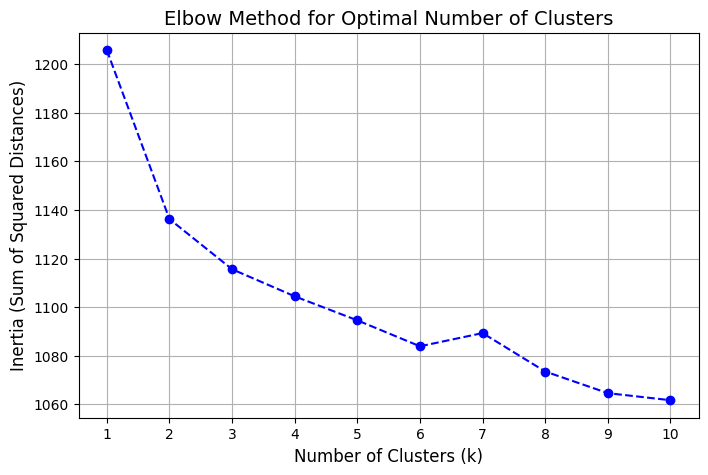

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range for the number of clusters
k_values = range(1, 11)
inertia_values = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_features)  # Fit on user features
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances to the closest cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.xticks(k_values)
plt.grid()
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Cluster users based on latent features in U
n_clusters = 3
user_clusters = KMeans(n_clusters=n_clusters, random_state=42).fit(user_features).labels_

# Map internal IDs to original IDs
internal_to_original = {i: trainset.to_raw_uid(i) for i in range(trainset.n_users)}

# Create a DataFrame with cluster assignments and original user IDs
cluster_df = pd.DataFrame({
    'internal_user_id': range(len(user_clusters)),
    'user_cluster': user_clusters
})
cluster_df['original_user_id'] = cluster_df['internal_user_id'].map(internal_to_original)

print(cluster_df)

     internal_user_id  user_cluster  original_user_id
0                   0             2               318
1                   1             0               679
2                   2             1               263
3                   3             2               609
4                   4             2               205
..                ...           ...               ...
938               938             1               687
939               939             1               111
940               940             1               364
941               941             1               888
942               942             0               353

[943 rows x 3 columns]


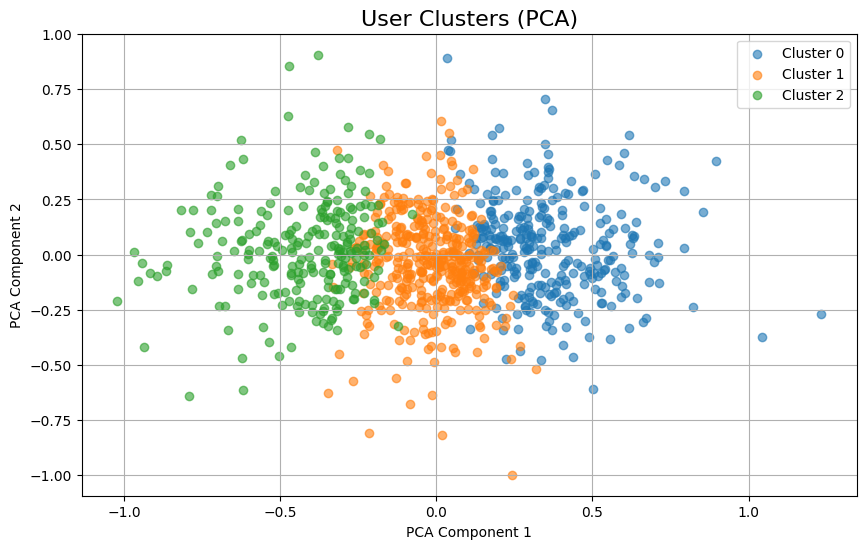

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce user features to 2D using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(user_features)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_points = reduced_features[user_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('User Clusters (PCA)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()


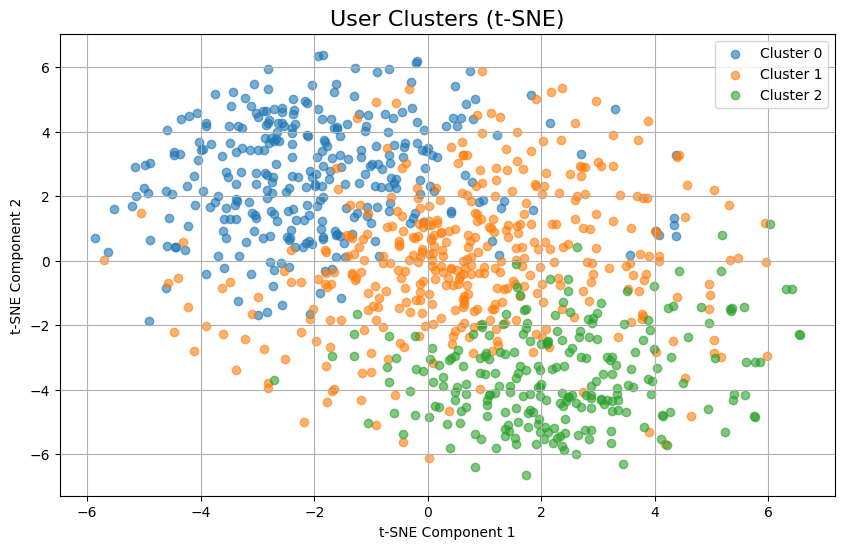

In [ ]:
from sklearn.manifold import TSNE

# Reduce user features to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_features_tsne = tsne.fit_transform(user_features)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_points = reduced_features_tsne[user_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('User Clusters (t-SNE)', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid()
plt.show()


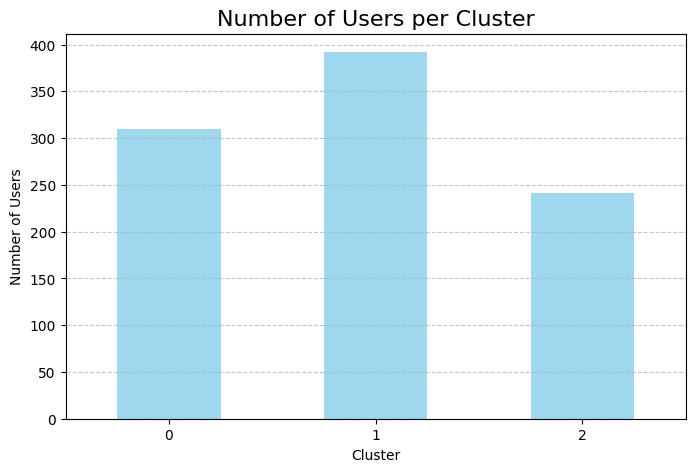

In [ ]:
cluster_counts = pd.Series(user_clusters).value_counts().sort_index()

# Bar plot of cluster sizes
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Number of Users per Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
cluster_counts

,count
0,310
1,392
2,241


In [ ]:
merged_df = data.merge(cluster_df, left_on='user_id', right_on='original_user_id')
print(merged_df)


       user_id  movie_id  rating  timestamp  internal_user_id  user_cluster  \
0          196       242     3.0  881250949               596             1   
1          186       302     3.0  891717742               314             2   
2           22       377     1.0  878887116               338             0   
3          244        51     2.0  880606923               199             0   
4          166       346     1.0  886397596               756             2   
...        ...       ...     ...        ...               ...           ...   
99688      880       476     3.0  880175444               193             0   
99689      716       204     5.0  879795543                51             1   
99690      276      1090     1.0  874795795                 5             0   
99691       13       225     2.0  882399156               169             0   
99692       12       203     3.0  879959583               269             2   

       original_user_id  
0                   196  

In [ ]:
movies = pd.read_csv('movies_clean.csv')

In [ ]:
# Merge datasets on movie_id
movies_gr = movies.drop(columns = ['release_date', 'video_release_date','imdb_url','unknown'])
merged_with_genres = pd.merge(merged_df, movies_gr, on='movie_id', how='inner')
print(merged_with_genres.columns)


Index(['user_id', 'movie_id', 'rating', 'timestamp', 'internal_user_id',
       'user_cluster', 'original_user_id', 'Unnamed: 0', 'movie_title',
       'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [ ]:
# Sum genres per cluster
genre_counts_by_cluster = merged_with_genres.groupby('user_cluster')[movies.columns[7:]].sum()
print(genre_counts_by_cluster)


              Action  Adventure  Animation  Children's  Comedy  Crime  \
user_cluster                                                            
0               9202       4784       1290        2265   11905   3496   
1               8469       4516       1135        2201    9591   2661   
2               7860       4401       1180        2687    8300   1879   

              Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  \
user_cluster                                                            
0                     414  16459      454        818    2240     1856   
1                     228  13735      399        597    1691     1679   
2                     116   9499      499        318    1369     1419   

              Mystery  Romance  Sci-Fi  Thriller   War  Western  
user_cluster                                                     
0                2103     7354    4925      8310  3632      713  
1                1875     6793    4242      7338  3309      596  
2   

In [ ]:
merged_with_genres['Action']

,Action
0,0
1,0
2,0
3,0
4,0
...,...
99688,0
99689,0
99690,0
99691,0


In [ ]:
# Step 1: Combine individual genre columns into a single 'genres' column
merged_with_genres['genres'] = merged_with_genres[
    [col for col in merged_with_genres.columns if col in movies.columns[6:]]
].apply(lambda row: ', '.join([genre for genre in row.index if row[genre] == 1]), axis=1)

# Step 2: Calculate ratings per genre
ratings_per_genre = merged_with_genres.explode('genres').groupby('genres')['rating'].count()

# Print results
print(ratings_per_genre)


genres
                                                       10
Action                                                879
Action, Adventure                                    1504
Action, Adventure, Animation, Children's, Fantasy      12
Action, Adventure, Animation, Horror, Sci-Fi           73
                                                     ... 
Sci-Fi, Thriller                                      382
Sci-Fi, War                                           194
Thriller                                             1094
War                                                    24
Western                                               581
Name: rating, Length: 216, dtype: int64


In [ ]:
#C = movie_stats['count'].mean()
#m = movie_stats['mean'].mean()



# Step 1: Calculate the global mean rating
global_mean = merged_with_genres['rating'].mean()

# Step 2: Define a confidence level (C)

C = ratings_per_genre.median()  # or ratings_per_genre.mean()
 # Adjust this based on your dataset and confidence in the global mean

# Step 3: Count the total number of ratings by cluster and genre
genre_counts = genre_counts_by_cluster

df_gr = pd.DataFrame()
df_gr['user_cluster'] = merged_with_genres['user_cluster']
# Step 4: Multiply genre columns by ratings to get weighted ratings
for genre in merged_with_genres.columns[9:-1]:

    df_gr[genre] = merged_with_genres[genre] * merged_with_genres['rating']

# Step 5: Sum weighted ratings by cluster and genre
weighted_ratings = df_gr.groupby('user_cluster').sum()

# Step 6: Compute Bayesian average ratings
bayesian_avg_ratings_by_genre = (weighted_ratings + C * global_mean) / (genre_counts + C)

# Step 7: Print Bayesian average ratings
print(bayesian_avg_ratings_by_genre)


                Action  Adventure  Animation  Children's    Comedy     Crime  \
user_cluster                                                                   
0             3.289315   3.329730   3.468000    3.163995  3.374539  3.702490   
1             3.523498   3.543376   3.681266    3.505596  3.476374  3.678210   
2             3.665548   3.657458   3.576810    3.414450  3.337909  3.422247   

              Documentary     Drama   Fantasy  Film-Noir    Horror   Musical  \
user_cluster                                                                   
0                3.798941  3.709689  3.141073   3.988918  3.256235  3.407449   
1                3.574533  3.755917  3.403229   3.838455  3.403515  3.610673   
2                3.301082  3.540099  3.350908   3.526727  3.285515  3.565479   

               Mystery   Romance    Sci-Fi  Thriller       War   Western  
user_cluster                                                              
0             3.659378  3.531646  3.473474  3.39

In [ ]:
avg_ratings_by_genre = bayesian_avg_ratings_by_genre

In [ ]:
g = pd.read_csv('u.genre')
g

,unknown|0
0,Action|1
1,Adventure|2
2,Animation|3
3,Children's|4
4,Comedy|5
5,Crime|6
6,Documentary|7
7,Drama|8
8,Fantasy|9
9,Film-Noir|10


In [ ]:
# Find the top-rated genre for each cluster
top_genres = avg_ratings_by_genre.idxmax(axis=1)
print("Top genres by cluster:\n", top_genres)

# Find the least-rated genre for each cluster
bottom_genres = avg_ratings_by_genre.idxmin(axis=1)
print("Least-rated genres by cluster:\n", bottom_genres)


Top genres by cluster:
 user_cluster
0    Film-Noir
1    Film-Noir
2          War
dtype: object
Least-rated genres by cluster:
 user_cluster
0    Fantasy
1    Fantasy
2     Horror
dtype: object


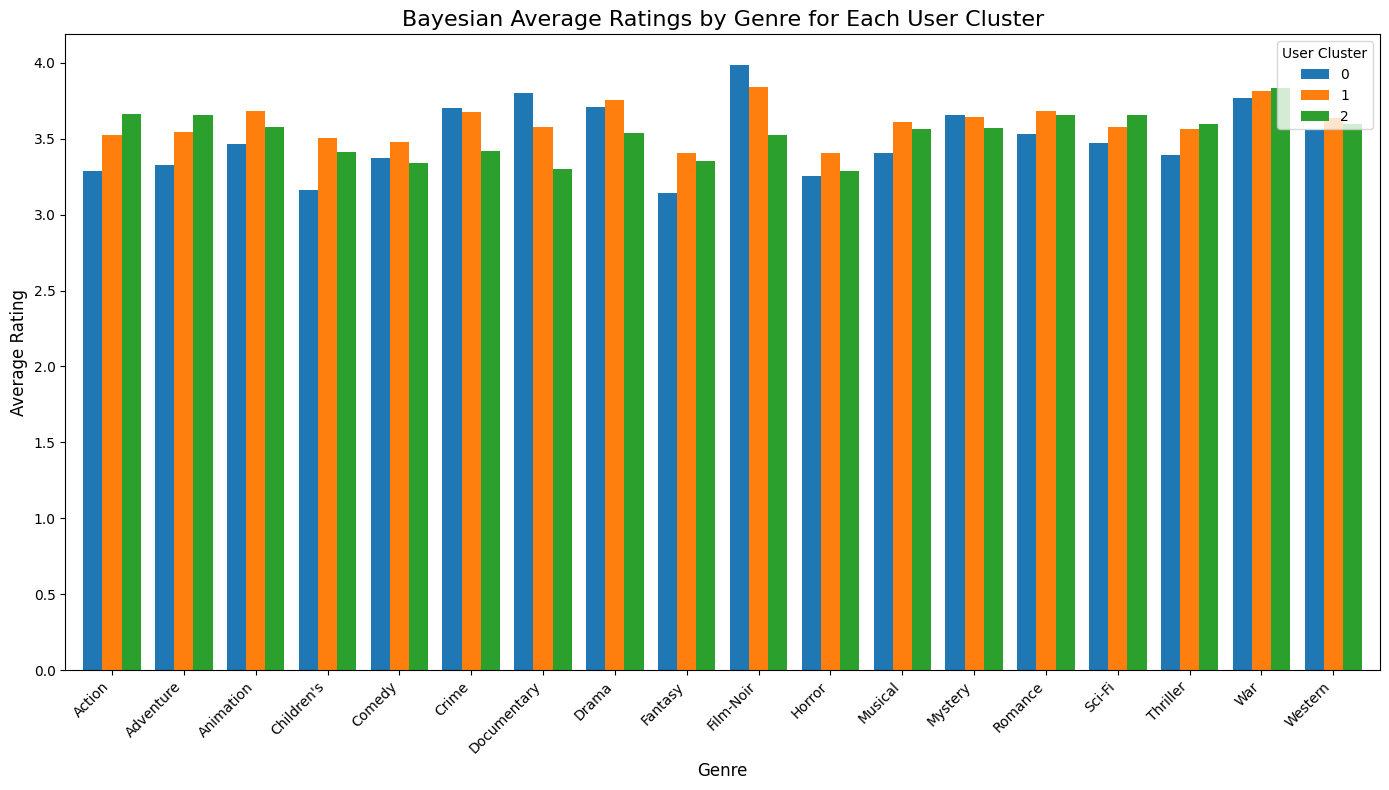

In [ ]:
# Transpose for easier plotting
avg_ratings_transposed = bayesian_avg_ratings_by_genre.T

# Plot a bar chart for each cluster
avg_ratings_transposed.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Bayesian Average Ratings by Genre for Each User Cluster', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='User Cluster', loc='upper right')
plt.tight_layout()
plt.show()


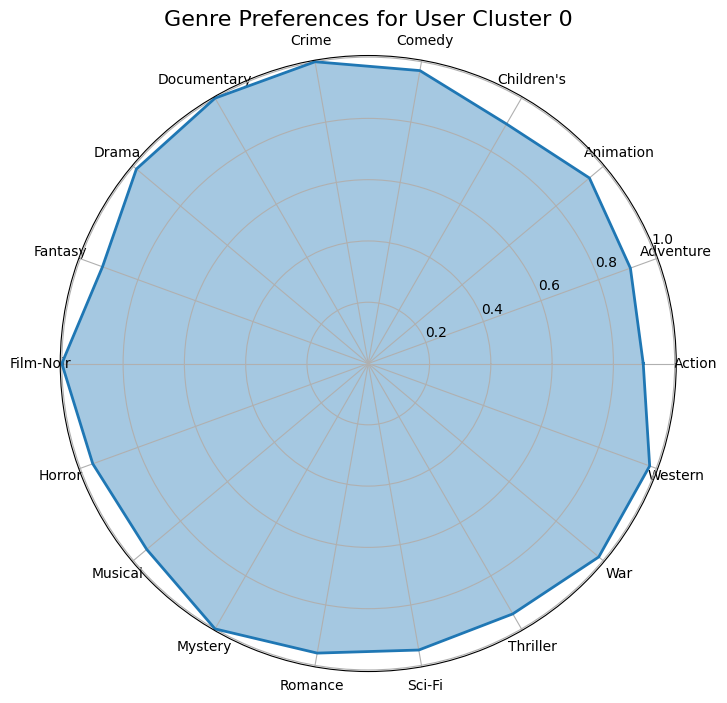

In [ ]:
from math import pi

# Normalize the data for better visualization
normalized_data = bayesian_avg_ratings_by_genre / bayesian_avg_ratings_by_genre.max()

# Example for one cluster (e.g., Cluster 0)
cluster_0_data = normalized_data.loc[0].values
genres = normalized_data.columns.tolist()

# Create angles for the radar chart
angles = [n / float(len(genres)) * 2 * pi for n in range(len(genres))]
angles += angles[:1]  # Close the circle

# Plot the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, list(cluster_0_data) + [cluster_0_data[0]], linewidth=2, linestyle='solid')
ax.fill(angles, list(cluster_0_data) + [cluster_0_data[0]], alpha=0.4)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(genres, fontsize=10)
ax.set_title('Genre Preferences for User Cluster 0', fontsize=16)
plt.show()


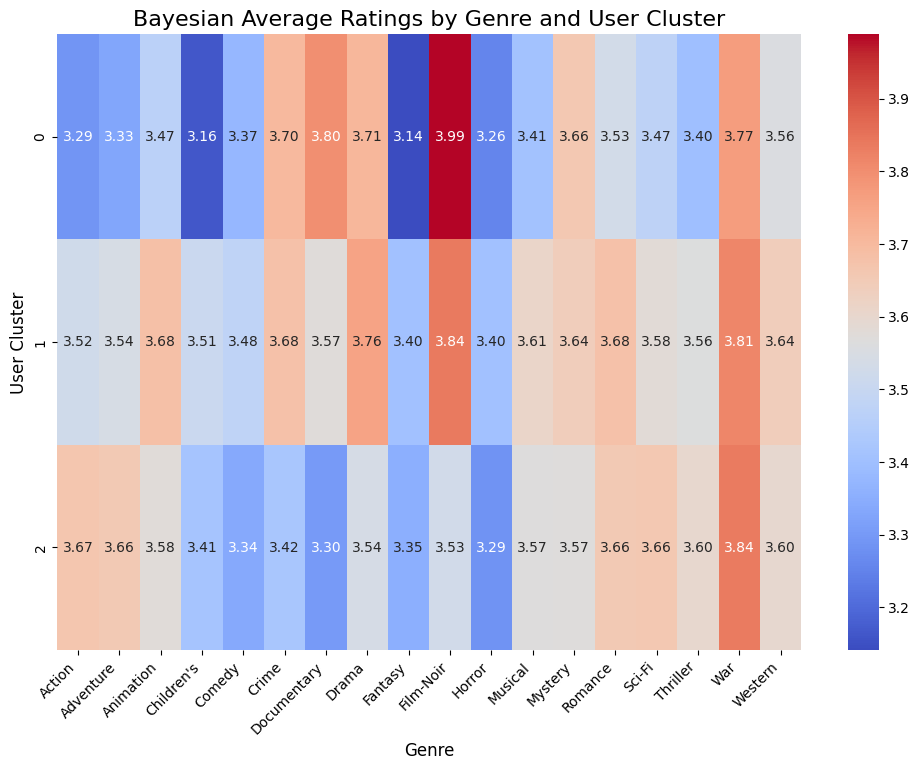

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bayesian_avg_ratings_by_genre, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title('Bayesian Average Ratings by Genre and User Cluster', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('User Cluster', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


Film-Noir is the top-rated genre for most clusters (0, 3, 4).
War is highly rated by Cluster 1.
Documentary is highly rated by Cluster 2.
This suggests distinct preferences among clusters, with some overlapping preferences (e.g., multiple clusters liking Film-Noir).

Fantasy is consistently the least-rated genre across all clusters.
This indicates a general lack of interest in Fantasy content, suggesting it may not be a priority for recommendations or promotions unless specific user preferences emerge later.

In [ ]:
# Count the number of movies rated in each genre by cluster

print("Number of Movies Rated by Genre per Cluster:\n", genre_counts)

# Combine with average ratings for context
combined_stats = pd.concat([avg_ratings_by_genre, genre_counts], axis=1, keys=['Average Rating', 'Counts'])
print(combined_stats)


Number of Movies Rated by Genre per Cluster:
               Action  Adventure  Animation  Children's  Comedy  Crime  \
user_cluster                                                            
0               9202       4784       1290        2265   11905   3496   
1               8469       4516       1135        2201    9591   2661   
2               7860       4401       1180        2687    8300   1879   

              Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  \
user_cluster                                                            
0                     414  16459      454        818    2240     1856   
1                     228  13735      399        597    1691     1679   
2                     116   9499      499        318    1369     1419   

              Mystery  Romance  Sci-Fi  Thriller   War  Western  
user_cluster                                                     
0                2103     7354    4925      8310  3632      713  
1                1875   

In [ ]:
# Filter for Fantasy ratings
fantasy_ratings = merged_with_genres[merged_with_genres['Fantasy'] == 1]
avg_fantasy_rating = fantasy_ratings.groupby('user_cluster')['rating'].mean()
print("Average Fantasy Ratings by Cluster:\n", avg_fantasy_rating)

# Check the number of Fantasy movies rated by each cluster
fantasy_counts = fantasy_ratings.groupby('user_cluster').size()
print("Fantasy Movie Counts by Cluster:\n", fantasy_counts)


Average Fantasy Ratings by Cluster:
 user_cluster
0    3.006608
1    3.353383
2    3.294589
Name: rating, dtype: float64
Fantasy Movie Counts by Cluster:
 user_cluster
0    454
1    399
2    499
dtype: int64


In [ ]:
# Merge user demographic data with clustering results
clustered_users = pd.merge(merged_with_genres, users, on='user_id')

# Analyze demographic distribution by cluster
age_distribution = clustered_users.groupby('user_cluster')['age'].mean()
gender_distribution = clustered_users.groupby('user_cluster')['gender'].value_counts(normalize=True)
occupation_distribution = clustered_users.groupby('user_cluster')['occupation'].value_counts(normalize=True)
location_distribution = clustered_users.groupby('user_cluster')['zip code'].value_counts(normalize=True)


print("Average Age by Cluster:\n", age_distribution)
print("Gender Distribution by Cluster:\n", gender_distribution)
print("Occupation Distribution by Cluster:\n", occupation_distribution)
print("Location Distribution by Cluster:\n", location_distribution)


Average Age by Cluster:
 user_cluster
0    31.560366
1    35.617512
2    31.772262
Name: age, dtype: float64
Gender Distribution by Cluster:
 user_cluster  gender
0             M         0.827568
              F         0.172432
1             M         0.709005
              F         0.290995
2             M         0.659621
              F         0.340379
Name: proportion, dtype: float64
Occupation Distribution by Cluster:
 user_cluster  occupation
0             student       0.258572
              engineer      0.103019
              educator      0.096237
              writer        0.076372
              other         0.073740
                              ...   
2             retired       0.009266
              lawyer        0.009191
              homemaker     0.007442
              doctor        0.003758
              salesman      0.003721
Name: proportion, Length: 62, dtype: float64
Location Distribution by Cluster:
 user_cluster  zip code
0             20009       0.017511

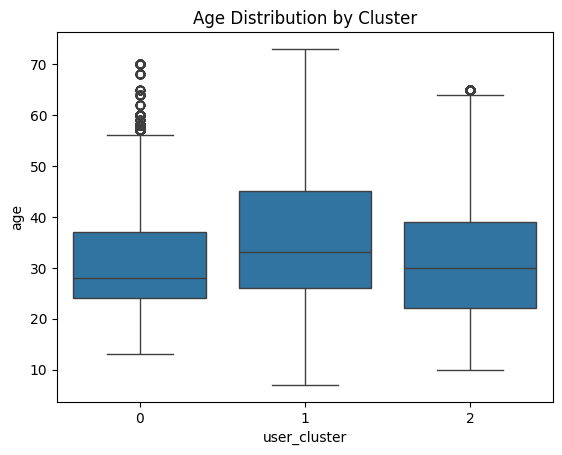

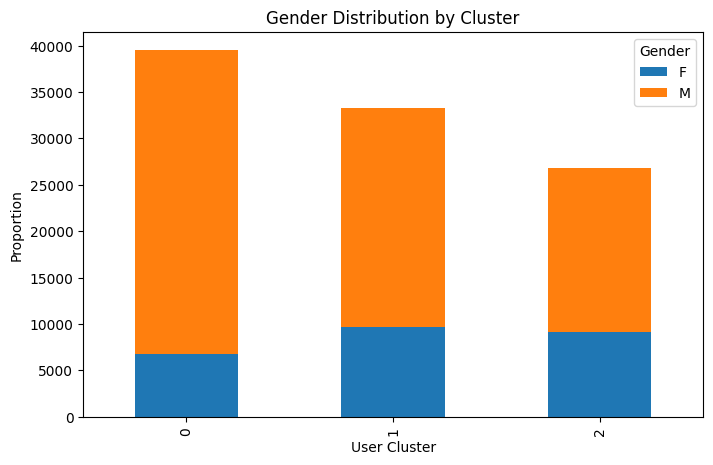

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for age distribution
sns.boxplot(x='user_cluster', y='age', data=clustered_users)
plt.title("Age Distribution by Cluster")
plt.show()

# Stacked bar chart for gender distribution
gender_counts = clustered_users.groupby(['user_cluster', 'gender']).size().unstack()
gender_counts.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Gender Distribution by Cluster")
plt.xlabel("User Cluster")
plt.ylabel("Proportion")
plt.legend(title="Gender")
plt.show()


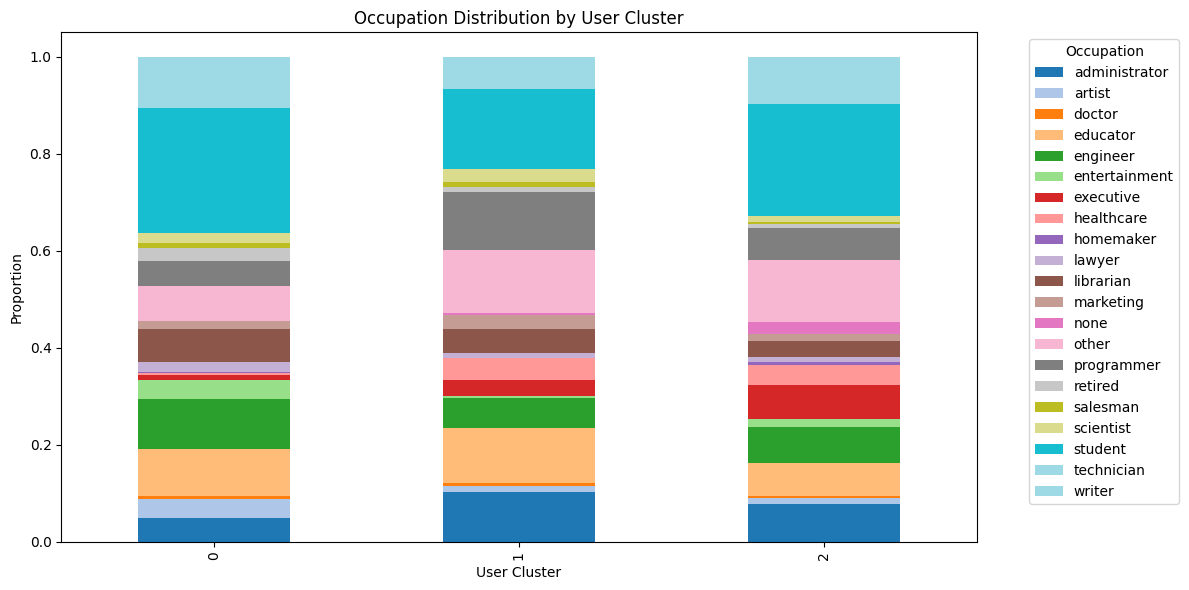

In [ ]:


# Aggregate occupation proportions by cluster
occupation_distribution = clustered_users.groupby(['user_cluster', 'occupation']).size().unstack().fillna(0)

# Normalize to get proportions
occupation_distribution = occupation_distribution.div(occupation_distribution.sum(axis=1), axis=0)

# Plot stacked bar chart
occupation_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Occupation Distribution by User Cluster")
plt.xlabel("User Cluster")
plt.ylabel("Proportion")
plt.legend(title="Occupation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


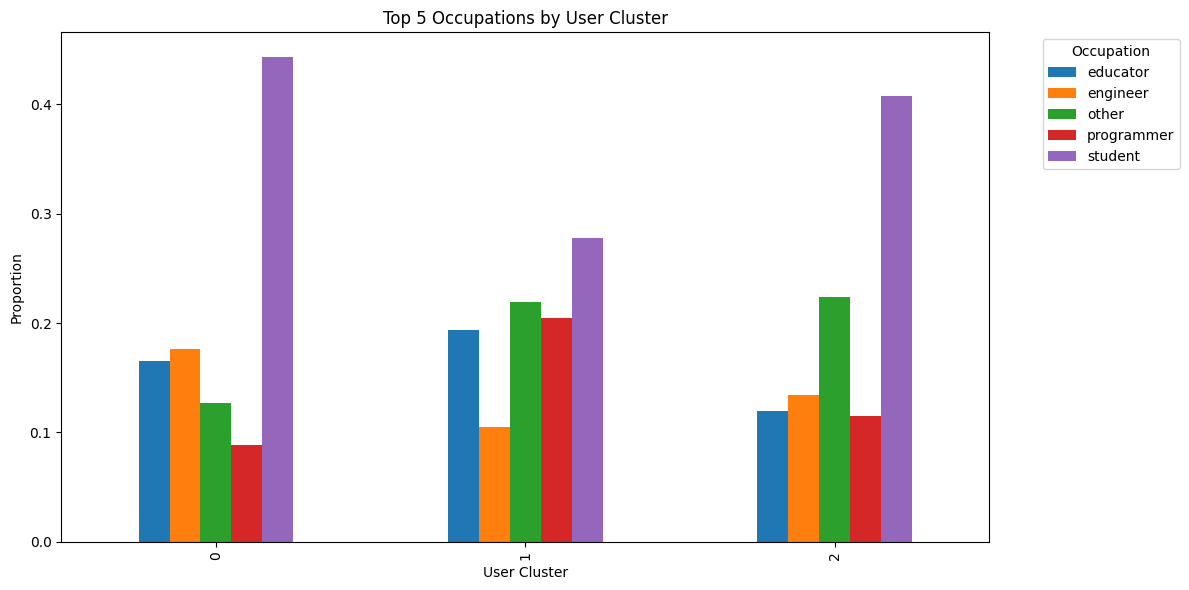

In [ ]:
# Select top 5 occupations across all clusters
top_occupations = clustered_users['occupation'].value_counts().head(5).index

# Filter for top occupations
filtered_data = clustered_users[clustered_users['occupation'].isin(top_occupations)]
filtered_distribution = filtered_data.groupby(['user_cluster', 'occupation']).size().unstack().fillna(0)

# Normalize to get proportions
filtered_distribution = filtered_distribution.div(filtered_distribution.sum(axis=1), axis=0)

# Plot grouped bar chart
filtered_distribution.plot(kind='bar', figsize=(12, 6))
plt.title("Top 5 Occupations by User Cluster")
plt.xlabel("User Cluster")
plt.ylabel("Proportion")
plt.legend(title="Occupation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Group by user_cluster and occupation, calculate proportions
occupation_counts = clustered_users.groupby(['user_cluster', 'occupation']).size()

# Normalize counts within each cluster to get proportions
occupation_proportions = occupation_counts.groupby(level=0).apply(lambda x: x / x.sum())

# Select top 5 occupations for each cluster
top_5_per_cluster = occupation_proportions.groupby('user_cluster').apply(lambda x: x.nlargest(5))

# Flatten the multi-level index and rename the last level as 'proportion'
top_5_per_cluster = top_5_per_cluster.reset_index(level=[0, 1], drop=True).reset_index()
top_5_per_cluster.columns = ['user_cluster', 'occupation', 'proportion']

print(top_5_per_cluster)


    user_cluster     occupation  proportion
0              0        student    0.258572
1              0       engineer    0.103019
2              0       educator    0.096237
3              0         writer    0.076372
4              0          other    0.073740
5              1        student    0.163439
6              1          other    0.129027
7              1     programmer    0.120319
8              1       educator    0.113683
9              1  administrator    0.102483
10             2        student    0.231273
11             2          other    0.127079
12             2  administrator    0.078257
13             2       engineer    0.075987
14             2      executive    0.069921


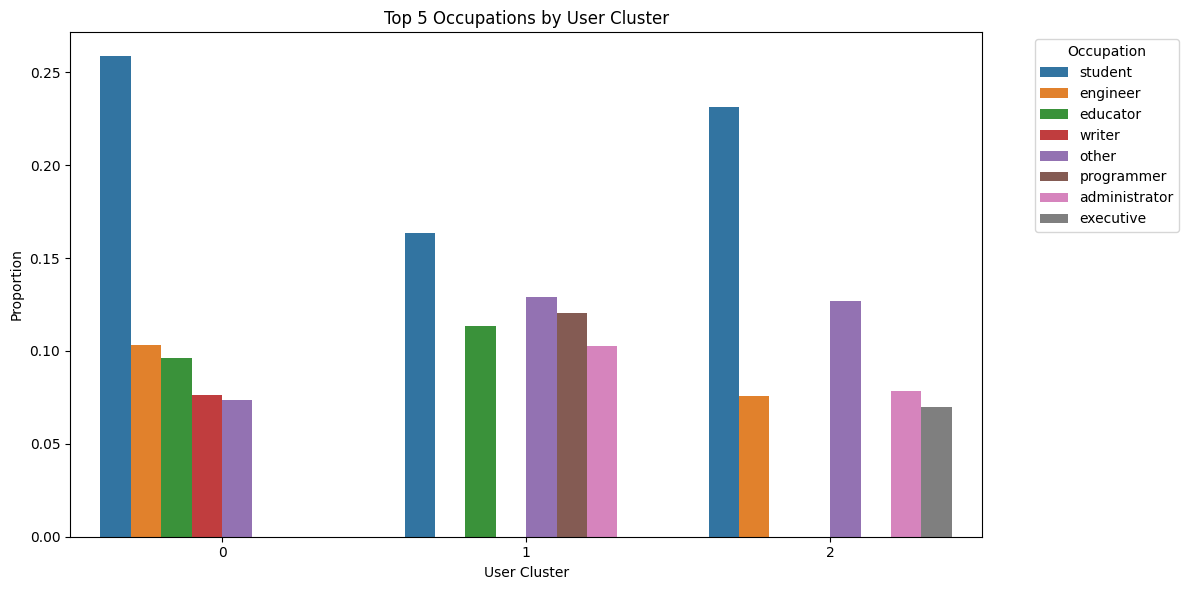

In [ ]:

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_5_per_cluster,
    x='user_cluster',
    y='proportion',
    hue='occupation',
    palette='tab10'
)
plt.title('Top 5 Occupations by User Cluster')
plt.xlabel('User Cluster')
plt.ylabel('Proportion')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Based on the visualization and data:

Cluster 0: Dominated by educators (24.8%) and engineers (12.1%). Content targeting intellectual and technical interests may work well.
Cluster 1: Has a significant number of students (21.8%) and a diverse mix of other occupations.
Cluster 2: Strong preference for engineers (30%) and creative fields like writers (19.4%).
Cluster 3: Dominated by students (28.2%), followed by engineers and other.
Cluster 4: More balanced, with students (17.6%), educators, and librarians.

In [ ]:
location_distribution_df = location_distribution.reset_index()



In [ ]:
# Extract the first 2 digits of zip codes
location_distribution_df['zip_prefix'] = location_distribution_df['zip code'].astype(str).str[:1]

# Group by cluster and zip prefix
zip_prefix_distribution = location_distribution_df.groupby(['user_cluster', 'zip_prefix']).size().unstack(fill_value=0)

# Plot the distribution by zip code prefix
zip_prefix_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Zip Code Prefix Distribution by Cluster', fontsize=16)
plt.xlabel('Zip Prefix', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
genre_columns = movies.columns[6:]
movies['genre'] = movies[genre_columns].apply(
    lambda row: ', '.join([genre for genre in genre_columns if row[genre] == 1]), axis=1
)
movies['genre']

In [ ]:


# Calculate average rating for each movie by cluster (including genre)
top_movies_per_cluster = merged_df.groupby(['user_cluster', 'movie_id', 'movie_title']).rating.mean()
top_movies_per_cluster = top_movies_per_cluster.groupby('user_cluster').nlargest(5).reset_index(level=0, drop=True)

# Sort to get the top-rated movies for each cluster
top_5_per_cluster_with_genre = pd.merge(
    top_movies_per_cluster.reset_index(),  # Reset index to make movie_id available
    movies[['movie_id', 'genre']].drop_duplicates(),  # Get unique movie_id-genre pairs
    on='movie_id',
    how='left'  # Ensure all top movies retain their genres
)

print(top_5_per_cluster_with_genre)


In [ ]:
# Convert top genres by cluster to a DataFrame
top_genres = pd.DataFrame({
    'user_cluster': [0, 1, 2],
    'top_genre': ['Film-Noir', 'War', 'Documentary', 'Film-Noir', 'Film-Noir']
})

# Merge the top-rated movies with the top-rated genres by cluster
combined_df = pd.merge(
    top_5_per_cluster_with_genre,
    top_genres,
    on='user_cluster',
    how='left'  # Ensures all rows from top_5_per_cluster_with_genre are included
)

print(combined_df)


In [ ]:
df_gr.columns

Index(['user_cluster', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
# Step 1: Calculate global mean rating and confidence parameter
global_mean = data['rating'].mean()
C = data.groupby('movie_id')['rating'].count().mean()  # Average number of ratings per movie

# Step 2: Calculate total ratings and count of ratings per genre
ratings_per_genre = df_gr[1:].sum(axis=0)

ratings_count_per_genre = df_gr[df_gr[1:]>0].count()

# Step 3: Compute Bayesian average rating per genre
bayesian_avg_rating_per_genre = (ratings_per_genre + C * global_mean) / (ratings_count_per_genre + C)

# Step 4: Display the results
print(bayesian_avg_rating_per_genre)
print(C, global_mean)

user_cluster    1.448653
Action          3.482251
Adventure       3.504854
Animation       3.575934
Children's      3.353567
Comedy          3.395287
Crime           3.632325
Documentary     3.662355
Drama           3.686509
Fantasy         3.228589
Film-Noir       3.908437
Horror          3.294361
Musical         3.521499
Mystery         3.638076
Romance         3.619419
Sci-Fi          3.561481
Thriller        3.509741
War             3.814001
Western         3.610659
dtype: float64
59.91165865384615 3.5299068139187306


In [ ]:
bayesian_avg_rating_per_genre=bayesian_avg_rating_per_genre[1:]

In [ ]:

# Combine the two datasets into a single DataFrame
genre_analysis = pd.DataFrame({
    'Bayesian Avg Rating': bayesian_avg_rating_per_genre,
    'Number of Movies': number_movies_by_genre
})

# Display the combined DataFrame
print(genre_analysis)


             Bayesian Avg Rating  Number of Movies
Action                  3.482251               249
Adventure               3.504854               133
Animation               3.575934                42
Children's              3.353567               120
Comedy                  3.395287               502
Crime                   3.632325               107
Documentary             3.662355                50
Drama                   3.686509               716
Fantasy                 3.228589                22
Film-Noir               3.908437                24
Horror                  3.294361                90
Musical                 3.521499                56
Mystery                 3.638076                60
Romance                 3.619419               244
Sci-Fi                  3.561481               100
Thriller                3.509741               248
War                     3.814001                71
Western                 3.610659                27


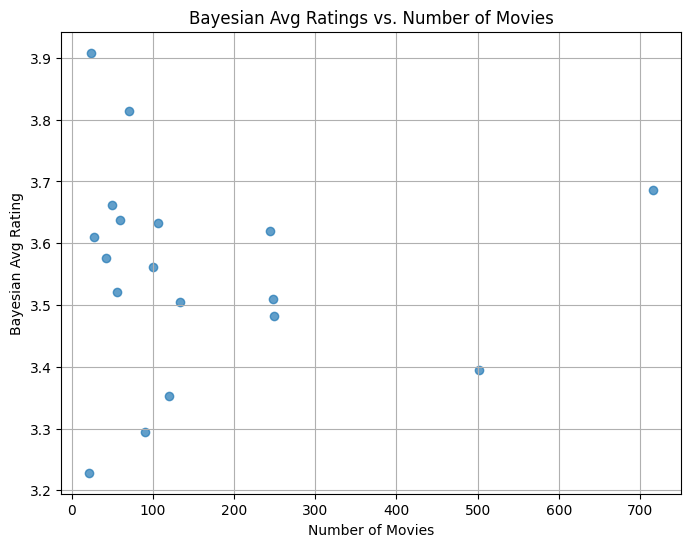

In [ ]:
# Scatter plot for Bayesian Avg Ratings vs. Number of Movies
plt.figure(figsize=(8, 6))
plt.scatter(genre_analysis['Number of Movies'], genre_analysis['Bayesian Avg Rating'], alpha=0.7)
plt.title('Bayesian Avg Ratings vs. Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Bayesian Avg Rating')
plt.grid(True)
plt.show()


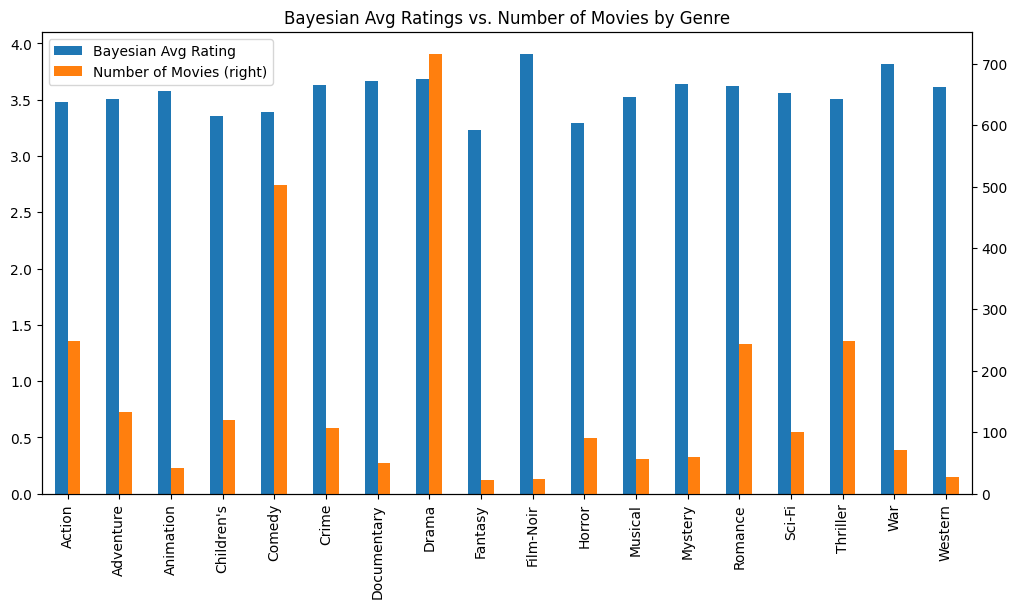

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for Bayesian Avg Rating and Number of Movies
genre_analysis.plot(kind='bar', figsize=(12, 6), secondary_y='Number of Movies', legend=True)
plt.title('Bayesian Avg Ratings vs. Number of Movies by Genre')
plt.xlabel('Genre')
plt.show()


In [ ]:
# Calculate the average Rating-to-Movie Ratio
avg_ratio = genre_analysis['Rating-to-Movie Ratio'].mean()

# Calculate the Balance Score for each genre
genre_analysis['Balance Score'] = genre_analysis['Rating-to-Movie Ratio'] / avg_ratio

# Display the results
print(genre_analysis)


             Bayesian Avg Rating  Number of Movies  Rating-to-Movie Ratio  \
Action                  3.482251               249               0.013985   
Adventure               3.504854               133               0.026352   
Animation               3.575934                42               0.085141   
Children's              3.353567               120               0.027946   
Comedy                  3.395287               502               0.006764   
Crime                   3.632325               107               0.033947   
Documentary             3.662355                50               0.073247   
Drama                   3.686509               716               0.005149   
Fantasy                 3.228589                22               0.146754   
Film-Noir               3.908437                24               0.162852   
Horror                  3.294361                90               0.036604   
Musical                 3.521499                56               0.062884   

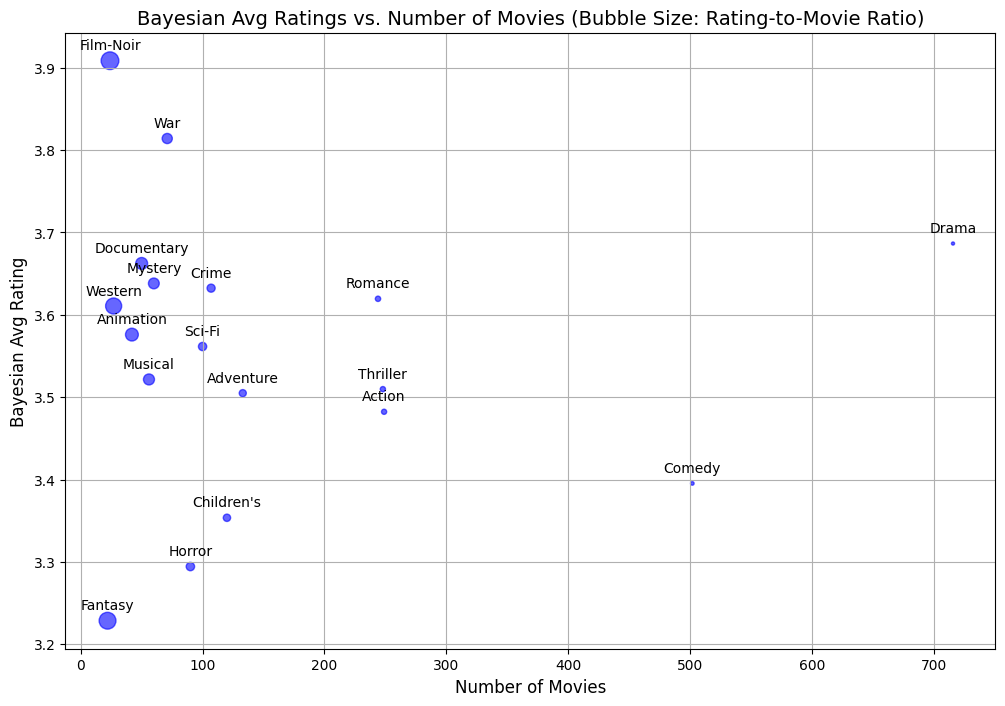

In [ ]:
genre_analysis['Rating-to-Movie Ratio'] =genre_analysis['Bayesian Avg Rating']/genre_analysis['Number of Movies']
# Bubble chart with genre labels
plt.figure(figsize=(12, 8))
plt.scatter(
    genre_analysis['Number of Movies'],
    genre_analysis['Bayesian Avg Rating'],
    s=genre_analysis['Rating-to-Movie Ratio'] * 1000,  # Scale bubble size
    alpha=0.6,
    color='blue'
)

# Add labels for each genre
'''
for i, genre in enumerate(genre_analysis.index):
    plt.text(
        genre_analysis['Number of Movies'].iloc[i],
        genre_analysis['Bayesian Avg Rating'].iloc[i],
        genre,  # Genre name
        fontsize=9, ha='center', va='center'
    )
'''
for i, genre in enumerate(genre_analysis.index):
    plt.annotate(
        genre,
        (genre_analysis['Number of Movies'].iloc[i], genre_analysis['Bayesian Avg Rating'].iloc[i]),
        textcoords="offset points",
        xytext=(0, 8),  # Offset the text slightly
        ha='center'
    )


# Chart aesthetics
plt.title('Bayesian Avg Ratings vs. Number of Movies (Bubble Size: Rating-to-Movie Ratio)', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Bayesian Avg Rating', fontsize=12)
plt.grid(True)
plt.show()


Cluster 2 Aligns Well:

Top-rated movies strongly align with the cluster's top-rated genre, Documentary.
Action: Promote more documentaries to maintain engagement.

Cluster 0 Shows Low Alignment:

Top-rated movies (e.g., Comedy, Romance) do not align with the top-rated genre, Film-Noir.
Action: Investigate if the cluster is underserved with Film-Noir content or if user preferences are shifting.

Cluster 1 Needs Exploration:

The top-rated genre is War, but top movies belong to other genres like Comedy and Drama.
Action: Ensure sufficient availability of War movies and adjust recommendations accordingly.

Overall Insights:

Some clusters show a mismatch between top-rated movies and their general genre preferences.
Action: Tailor recommendations and content acquisition strategies to improve alignment.